Market Basket Magic: Assignment 5

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Understanding data and data visualisation

In [2]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Box plot for Spending Score (1-100) and Annual Income (k$)

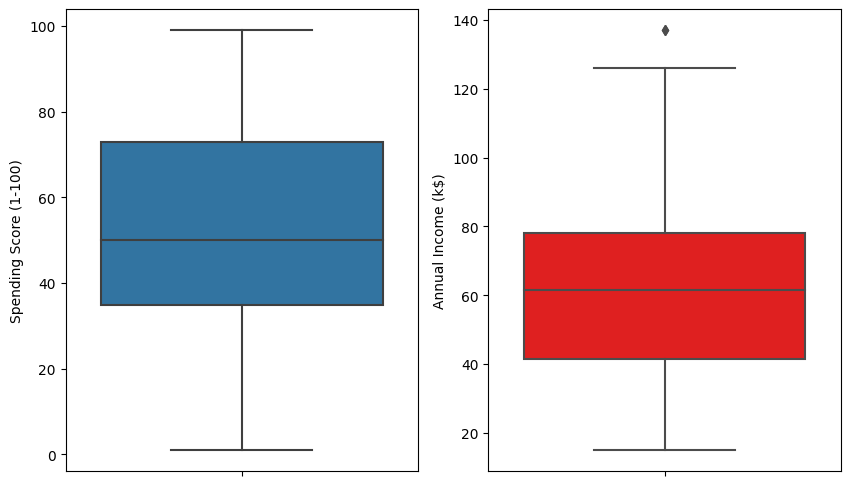

In [3]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"])
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"], color="red")
plt.show()

Violin plot for Visualizing age frequency.

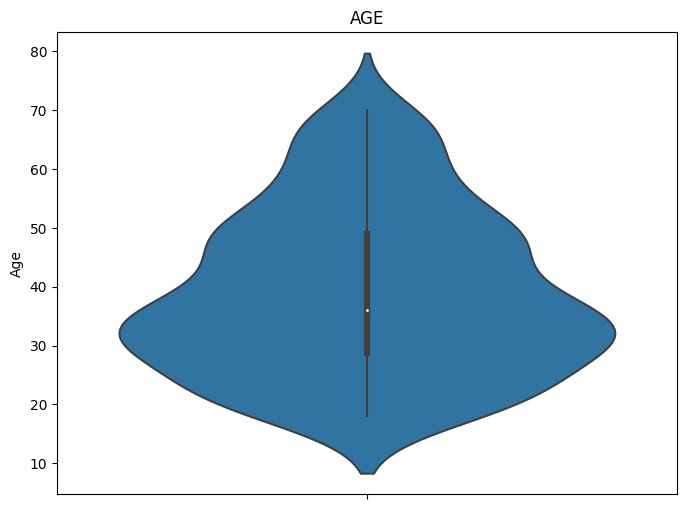

In [4]:
plt.figure(figsize=(8,6))
sns.violinplot(y=df["Age"])
plt.title('AGE')
plt.show()

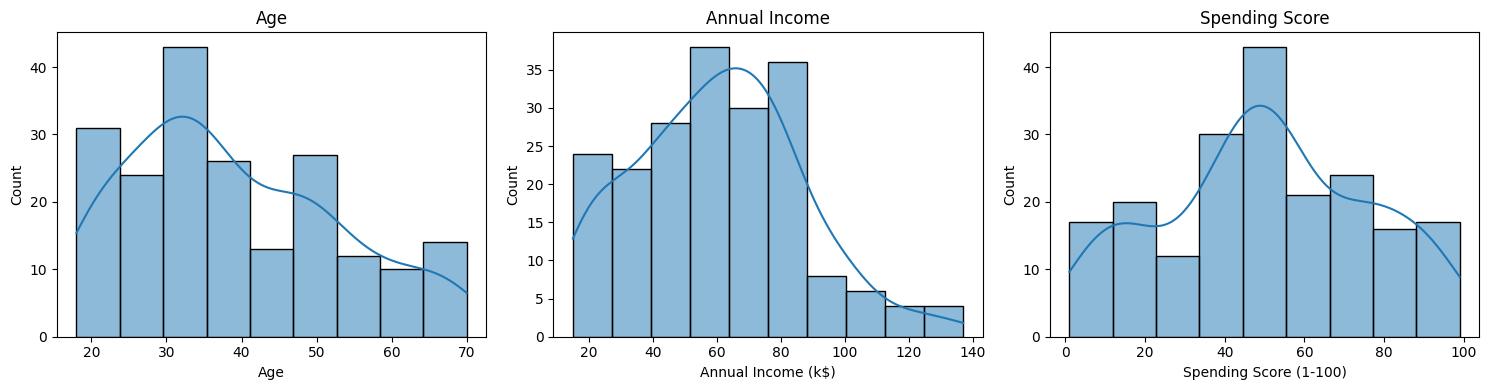

In [8]:
plt.figure(figsize=(15, 4))

# First Subplot: Age
plt.subplot(1, 3, 1)
sns.histplot(data=df['Age'], kde=True)
plt.title('Age')
plt.xlabel('Age')

# Second Subplot: Annual Income
plt.subplot(1, 3, 2)
sns.histplot(data=df['Annual Income (k$)'], kde=True)
plt.title('Annual Income')
plt.xlabel('Annual Income (k$)')

# Third Subplot: Spending Score
plt.subplot(1, 3, 3)
sns.histplot(data=df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score')
plt.xlabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

Using a bar plot to distinguish between male and female gender customers

In [9]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

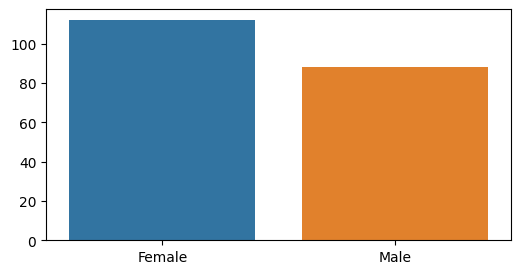

In [5]:
genders = df.Gender.value_counts()
plt.figure(figsize=(6,3))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

Spending scores according to Gender

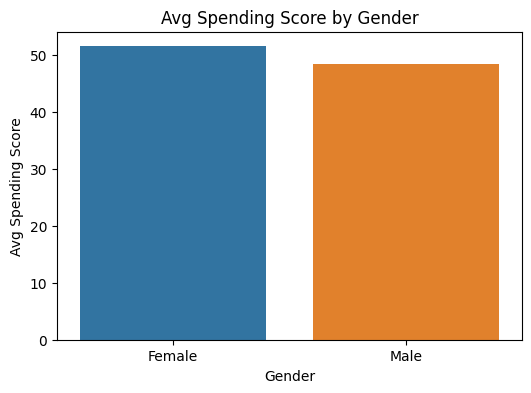

In [10]:
mean_scores = df.groupby('Gender')['Spending Score (1-100)'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.xlabel('Gender')
plt.ylabel('Avg Spending Score')
plt.title('Avg Spending Score by Gender')
plt.show()

Spending scores accoding to age.

In [11]:
edges = [18, 25, 35, 45, 55, 65, 70]
df['Age Group'] = pd.cut(df['Age'], bins=edges, labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])

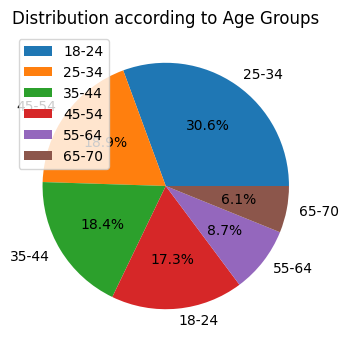

In [12]:
plt.figure(figsize=(6, 4))
plt.pie(df['Age Group'].value_counts(), labels=df['Age Group'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution according to Age Groups')
plt.legend(['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])
plt.show()

Mean spending according to age groups.

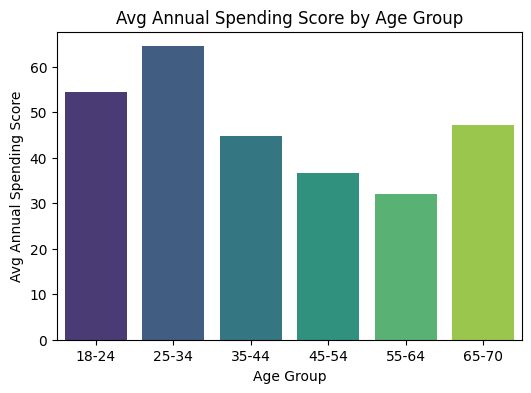

In [13]:
mean_scores = df.groupby('Age Group')['Spending Score (1-100)'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=mean_scores.index, y=mean_scores.values,palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Avg Annual Spending Score')
plt.title('Avg Annual Spending Score by Age Group')
plt.show()

Data preprocessing and model making

Using Kmeans clustering

In [14]:
df1 = pd.DataFrame({'Age Group': df['Age Group']})
column_to_drop = 'Age Group'
df.drop(column_to_drop, axis=1, inplace=True)

In [15]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [7]:

df.drop(["CustomerID"], axis = 1, inplace=True) #this column is unnecssary

In [16]:
X= df.iloc[:, [2,3]].values

In [17]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth ,SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

In [19]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [20]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

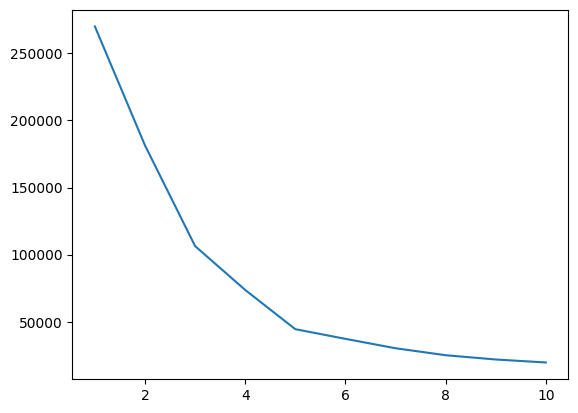

In [21]:
plt.plot(range(1,11),wcss)
plt.show()

Using 4 Clusters

In [22]:
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

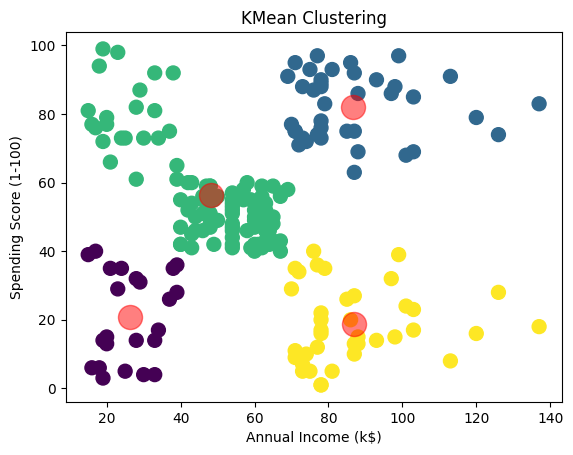

In [23]:
labels_km4 = km.labels_
centroids_km4 = km.cluster_centers_
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=labels_km4, s=100)
plt.scatter(x=centroids_km4[:, 0], y=centroids_km4[:, 1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('KMean Clustering')
plt.show()

Evaluating model

In [24]:
inertia_score = km.inertia_
print("inertia_score of 4 clucters:",inertia_score)

inertia_score of 4 clucters: 73679.78903948836


In [25]:
silhouette_km4 = silhouette_score(X, labels_km4)
print("Silhouette Score  of 4 clusters:", silhouette_km4)

Silhouette Score  of 4 clusters: 0.4931963109249047


Using 5 Clusters

In [26]:
km = KMeans(n_clusters=5)
y_means = km.fit_predict(X)

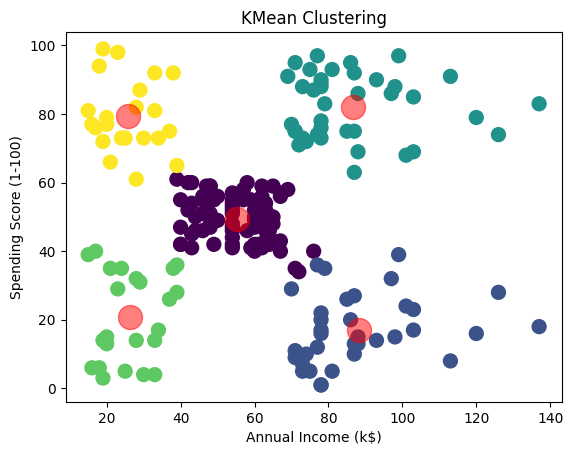

In [27]:
labels_km5 = km.labels_
centroids_km5 = km.cluster_centers_

plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=labels_km5, s=100)
plt.scatter(x=centroids_km5[:, 0], y=centroids_km5[:, 1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('KMean Clustering')
plt.show()

In [28]:
inertia_score = km.inertia_
print("inertia_score of 5 clusters:",inertia_score)

inertia_score of 5 clusters: 44448.4554479337


In [29]:
silhouette_km5 = silhouette_score(X, labels_km5)
print("Silhouette Score  of 5 clusters:", silhouette_km5)

Silhouette Score  of 5 clusters: 0.553931997444648


After applying Kmeans method we got silhouette scores:

For 4 Clusters: 0.4931963109249047

For 5 Clusters: 0.553931997444648